# Extracting date and time

In [1]:
import pandas as pd
air_quality = pd.read_csv('air_quality.csv')

In [2]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95685 entries, 0 to 95684
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  95685 non-null  object 
 1   PM2.5      95685 non-null  float64
 2   PM10       95685 non-null  float64
 3   SO2        95685 non-null  float64
 4   NO2        95685 non-null  float64
 5   CO         95685 non-null  float64
 6   O3         95685 non-null  float64
 7   TEMP       95685 non-null  float64
 8   PRES       95685 non-null  float64
 9   DEWP       95685 non-null  float64
 10  RAIN       95685 non-null  float64
 11  wd         95685 non-null  object 
 12  WSPM       95685 non-null  float64
 13  station    95685 non-null  object 
dtypes: float64(11), object(3)
memory usage: 10.2+ MB


In [3]:
air_quality.head()

,date_time,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 01:00:00,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 05:00:00,4.0,4.0,9.0,25.0,300.0,78.0,-2.4,1027.5,-21.3,0.0,NW,2.4,Dongsi
3,2013-03-01 06:00:00,5.0,5.0,10.0,29.0,400.0,67.0,-2.5,1028.2,-20.4,0.0,NW,2.2,Dongsi
4,2013-03-01 07:00:00,3.0,6.0,12.0,40.0,400.0,52.0,-1.4,1029.5,-20.4,0.0,NNW,3.0,Dongsi


In [4]:
# air_quality['date_time'].dt.year # AttributeError: Can only use .dt accessor with datetimelike values

In [5]:
pd.to_datetime(air_quality['date_time'])

0       2013-03-01 00:00:00
1       2013-03-01 01:00:00
2       2013-03-01 05:00:00
3       2013-03-01 06:00:00
4       2013-03-01 07:00:00
                ...        
95680   2017-02-28 15:00:00
95681   2017-02-28 16:00:00
95682   2017-02-28 21:00:00
95683   2017-02-28 22:00:00
95684   2017-02-28 23:00:00
Name: date_time, Length: 95685, dtype: datetime64[ns]

In [6]:
air_quality['date_time'] = pd.to_datetime(air_quality['date_time'])

In [7]:
air_quality.dtypes

date_time    datetime64[ns]
PM2.5               float64
PM10                float64
SO2                 float64
NO2                 float64
CO                  float64
O3                  float64
TEMP                float64
PRES                float64
DEWP                float64
RAIN                float64
wd                   object
WSPM                float64
station              object
dtype: object

In [8]:
air_quality['year'] = air_quality['date_time'].dt.year
air_quality['month'] = air_quality['date_time'].dt.month
air_quality['day'] = air_quality['date_time'].dt.day
air_quality['hour'] = air_quality['date_time'].dt.hour
air_quality['quarter'] = air_quality['date_time'].dt.quarter
air_quality['day_of_week_num'] = air_quality['date_time'].dt.dayofweek
air_quality['day_of_week_name'] = air_quality['date_time'].dt.day_name()

air_quality[['date_time', 'year', 'month', 'day', 'hour', 'quarter', 'day_of_week_num', 'day_of_week_name']]

,date_time,year,month,day,hour,quarter,day_of_week_num,day_of_week_name
0,2013-03-01 00:00:00,2013,3,1,0,1,4,Friday
1,2013-03-01 01:00:00,2013,3,1,1,1,4,Friday
2,2013-03-01 05:00:00,2013,3,1,5,1,4,Friday
3,2013-03-01 06:00:00,2013,3,1,6,1,4,Friday
4,2013-03-01 07:00:00,2013,3,1,7,1,4,Friday
...,...,...,...,...,...,...,...,...
95680,2017-02-28 15:00:00,2017,2,28,15,1,1,Tuesday
95681,2017-02-28 16:00:00,2017,2,28,16,1,1,Tuesday
95682,2017-02-28 21:00:00,2017,2,28,21,1,1,Tuesday
95683,2017-02-28 22:00:00,2017,2,28,22,1,1,Tuesday


In [9]:
air_quality[['day_of_week_num', 'day_of_week_name']].value_counts()

day_of_week_num  day_of_week_name
6                Sunday              13931
5                Saturday            13812
4                Friday              13782
3                Thursday            13633
0                Monday              13536
1                Tuesday             13523
2                Wednesday           13468
dtype: int64

In [10]:
air_quality['date_time'].max()

Timestamp('2017-02-28 23:00:00')

In [11]:
air_quality['date_time'].min()

Timestamp('2013-03-01 00:00:00')

In [12]:
air_quality['date_time'].max() - air_quality['date_time'].min()

Timedelta('1460 days 23:00:00')

In [13]:
date_time_range = air_quality['date_time'].max() - air_quality['date_time'].min()

In [14]:
pd.Timedelta(days=1)

Timedelta('1 days 00:00:00')

In [15]:
pd.Timedelta(days=365)

Timedelta('365 days 00:00:00')

In [16]:
date_time_range/pd.Timedelta(days=1)

1460.9583333333333

In [17]:
date_time_range/pd.Timedelta(days=365)

4.002625570776256

In [18]:
1460.9583333333333/365

4.002625570776256

In [19]:
pd.Timestamp('2022/01/01')

Timestamp('2022-01-01 00:00:00')

In [20]:
pd.Timestamp('2022/01/01') - air_quality['date_time']

0       3228 days 00:00:00
1       3227 days 23:00:00
2       3227 days 19:00:00
3       3227 days 18:00:00
4       3227 days 17:00:00
               ...        
95680   1767 days 09:00:00
95681   1767 days 08:00:00
95682   1767 days 03:00:00
95683   1767 days 02:00:00
95684   1767 days 01:00:00
Name: date_time, Length: 95685, dtype: timedelta64[ns]

In [21]:
air_quality['time_until_2022'] = pd.Timestamp('2022/01/01') - air_quality['date_time']

In [22]:
air_quality['time_until_2022']/pd.Timedelta(days=1)

0        3228.000000
1        3227.958333
2        3227.791667
3        3227.750000
4        3227.708333
            ...     
95680    1767.375000
95681    1767.333333
95682    1767.125000
95683    1767.083333
95684    1767.041667
Name: time_until_2022, Length: 95685, dtype: float64

In [23]:
air_quality['time_until_2022_days'] = air_quality['time_until_2022']/pd.Timedelta(days=1)
air_quality['time_until_2022_weeks'] = air_quality['time_until_2022']/pd.Timedelta(weeks=1)

In [24]:
air_quality[['date_time', 'time_until_2022', 'time_until_2022_days', 'time_until_2022_weeks']]

,date_time,time_until_2022,time_until_2022_days,time_until_2022_weeks
0,2013-03-01 00:00:00,3228 days 00:00:00,3228.000000,461.142857
1,2013-03-01 01:00:00,3227 days 23:00:00,3227.958333,461.136905
2,2013-03-01 05:00:00,3227 days 19:00:00,3227.791667,461.113095
3,2013-03-01 06:00:00,3227 days 18:00:00,3227.750000,461.107143
4,2013-03-01 07:00:00,3227 days 17:00:00,3227.708333,461.101190
...,...,...,...,...
95680,2017-02-28 15:00:00,1767 days 09:00:00,1767.375000,252.482143
95681,2017-02-28 16:00:00,1767 days 08:00:00,1767.333333,252.476190
95682,2017-02-28 21:00:00,1767 days 03:00:00,1767.125000,252.446429
95683,2017-02-28 22:00:00,1767 days 02:00:00,1767.083333,252.440476


In [25]:
3228/7

461.14285714285717

In [26]:
air_quality['date_time'] < pd.Timestamp('2016/01/01')

0         True
1         True
2         True
3         True
4         True
         ...  
95680    False
95681    False
95682    False
95683    False
95684    False
Name: date_time, Length: 95685, dtype: bool

In [27]:
air_quality['prior_2016_ind'] = (air_quality['date_time'] < pd.Timestamp('2016/01/01'))

In [28]:
air_quality[['date_time', 'prior_2016_ind']]

,date_time,prior_2016_ind
0,2013-03-01 00:00:00,True
1,2013-03-01 01:00:00,True
2,2013-03-01 05:00:00,True
3,2013-03-01 06:00:00,True
4,2013-03-01 07:00:00,True
...,...,...
95680,2017-02-28 15:00:00,False
95681,2017-02-28 16:00:00,False
95682,2017-02-28 21:00:00,False
95683,2017-02-28 22:00:00,False


In [29]:
air_quality.columns

Index(['date_time', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES',
       'DEWP', 'RAIN', 'wd', 'WSPM', 'station', 'year', 'month', 'day', 'hour',
       'quarter', 'day_of_week_num', 'day_of_week_name', 'time_until_2022',
       'time_until_2022_days', 'time_until_2022_weeks', 'prior_2016_ind'],
      dtype='object')

# Binning

In [30]:
air_quality['PM2.5'].head()

0    9.0
1    4.0
2    4.0
3    5.0
4    3.0
Name: PM2.5, dtype: float64

<AxesSubplot:>

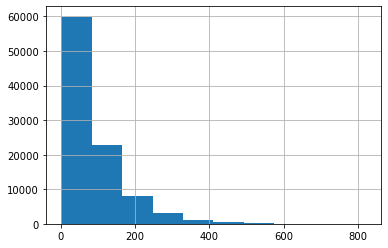

In [31]:
air_quality['PM2.5'].hist()

In [32]:
pd.cut(air_quality['PM2.5'], bins=10)

0        (1.181, 83.9]
1        (1.181, 83.9]
2        (1.181, 83.9]
3        (1.181, 83.9]
4        (1.181, 83.9]
             ...      
95680    (1.181, 83.9]
95681    (1.181, 83.9]
95682    (1.181, 83.9]
95683    (1.181, 83.9]
95684    (1.181, 83.9]
Name: PM2.5, Length: 95685, dtype: category
Categories (10, interval[float64]): [(1.181, 83.9] < (83.9, 165.8] < (165.8, 247.7] < (247.7, 329.6] ... (493.4, 575.3] < (575.3, 657.2] < (657.2, 739.1] < (739.1, 821.0]]

In [33]:
pd.cut(air_quality['PM2.5'], bins=10).value_counts()

(1.181, 83.9]     59923
(83.9, 165.8]     22741
(165.8, 247.7]     8132
(247.7, 329.6]     3225
(329.6, 411.5]     1011
(411.5, 493.4]      384
(493.4, 575.3]      171
(575.3, 657.2]       70
(657.2, 739.1]       22
(739.1, 821.0]        6
Name: PM2.5, dtype: int64

In [34]:
83.9 - 1.181

82.71900000000001

In [35]:
247.7 - 165.8

81.89999999999998

In [36]:
pd.cut(air_quality['PM2.5'], bins=[0, 12, 35.4, 55.4, 150.4, 250.4, 999])

0         (0.0, 12.0]
1         (0.0, 12.0]
2         (0.0, 12.0]
3         (0.0, 12.0]
4         (0.0, 12.0]
             ...     
95680     (0.0, 12.0]
95681     (0.0, 12.0]
95682    (12.0, 35.4]
95683    (12.0, 35.4]
95684    (12.0, 35.4]
Name: PM2.5, Length: 95685, dtype: category
Categories (6, interval[float64]): [(0.0, 12.0] < (12.0, 35.4] < (35.4, 55.4] < (55.4, 150.4] < (150.4, 250.4] < (250.4, 999.0]]

In [37]:
pd.cut(air_quality['PM2.5'],
       bins=[0, 12, 35.4, 55.4, 150.4, 250.4, 999],
       labels=['Good', 
               'Moderate', 
               'Unhealthy for sensitive groups', 
               'Unhealthy',
               'Very unhealthy',
               'Hazardous'])

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
95680        Good
95681        Good
95682    Moderate
95683    Moderate
95684    Moderate
Name: PM2.5, Length: 95685, dtype: category
Categories (6, object): ['Good' < 'Moderate' < 'Unhealthy for sensitive groups' < 'Unhealthy' < 'Very unhealthy' < 'Hazardous']

In [38]:
air_quality['PM2.5_category'] = pd.cut(air_quality['PM2.5'],
                                       bins=[0, 12, 35.4, 55.4, 150.4, 250.4, 999],
                                       labels=['Good', 
                                               'Moderate', 
                                               'Unhealthy for sensitive groups', 
                                               'Unhealthy',
                                               'Very unhealthy',
                                               'Hazardous'])

In [39]:
air_quality[['PM2.5', 'PM2.5_category']]

,PM2.5,PM2.5_category
0,9.0,Good
1,4.0,Good
2,4.0,Good
3,5.0,Good
4,3.0,Good
...,...,...
95680,9.0,Good
95681,10.0,Good
95682,18.0,Moderate
95683,15.0,Moderate


In [40]:
air_quality['PM2.5_category'].value_counts()

Unhealthy                         34257
Moderate                          19853
Good                              13576
Unhealthy for sensitive groups    12457
Very unhealthy                    10821
Hazardous                          4721
Name: PM2.5_category, dtype: int64

In [41]:
air_quality['PM2.5_category'].value_counts(normalize=True)

Unhealthy                         0.358018
Moderate                          0.207483
Good                              0.141882
Unhealthy for sensitive groups    0.130188
Very unhealthy                    0.113090
Hazardous                         0.049339
Name: PM2.5_category, dtype: float64

In [42]:
pd.qcut(air_quality['PM2.5'], q=4)

0        (1.999, 23.0]
1        (1.999, 23.0]
2        (1.999, 23.0]
3        (1.999, 23.0]
4        (1.999, 23.0]
             ...      
95680    (1.999, 23.0]
95681    (1.999, 23.0]
95682    (1.999, 23.0]
95683    (1.999, 23.0]
95684    (1.999, 23.0]
Name: PM2.5, Length: 95685, dtype: category
Categories (4, interval[float64]): [(1.999, 23.0] < (23.0, 59.0] < (59.0, 116.0] < (116.0, 821.0]]

In [43]:
pd.qcut(air_quality['PM2.5'], q=4).value_counts(normalize=True)

(1.999, 23.0]     0.258222
(59.0, 116.0]     0.249862
(116.0, 821.0]    0.247113
(23.0, 59.0]      0.244803
Name: PM2.5, dtype: float64

In [44]:
pd.qcut(air_quality['PM2.5'], q=4).value_counts(normalize=True, sort=False)

(1.999, 23.0]     0.258222
(23.0, 59.0]      0.244803
(59.0, 116.0]     0.249862
(116.0, 821.0]    0.247113
Name: PM2.5, dtype: float64

In [45]:
air_quality['PM2.5'].describe()

count    95685.000000
mean        83.477884
std         82.678134
min          2.000000
25%         23.000000
50%         59.000000
75%        116.000000
max        821.000000
Name: PM2.5, dtype: float64

In [46]:
pd.qcut(air_quality['TEMP'], 
        q=5,
        labels=['Very Cold', 'Cold', 'Warm', 'Hot', 'Very Hot'])

0        Very Cold
1        Very Cold
2        Very Cold
3        Very Cold
4        Very Cold
           ...    
95680         Warm
95681         Warm
95682         Warm
95683         Warm
95684         Cold
Name: TEMP, Length: 95685, dtype: category
Categories (5, object): ['Very Cold' < 'Cold' < 'Warm' < 'Hot' < 'Very Hot']

In [47]:
pd.qcut(air_quality['TEMP'], 
        q=5,
        labels=['Very Cold', 'Cold', 'Warm', 'Hot', 'Very Hot']).value_counts()

Hot          19189
Very Cold    19156
Cold         19154
Warm         19143
Very Hot     19043
Name: TEMP, dtype: int64

In [48]:
air_quality['TEMP_category'] = pd.qcut(air_quality['TEMP'], 
                                       q=5,
                                       labels=['Very Cold', 'Cold', 'Warm', 'Hot', 'Very Hot'])

In [49]:
air_quality[['TEMP', 'TEMP_category']]

,TEMP,TEMP_category
0,-0.5,Very Cold
1,-0.7,Very Cold
2,-2.4,Very Cold
3,-2.5,Very Cold
4,-1.4,Very Cold
...,...,...
95680,15.4,Warm
95681,14.9,Warm
95682,10.8,Warm
95683,10.5,Warm


In [50]:
air_quality.to_pickle('air_quality.pkl')

# Mapping to new values

In [51]:
import pandas as pd
air_quality = pd.read_pickle('air_quality.pkl')

In [52]:
air_quality['day_of_week_name']

0         Friday
1         Friday
2         Friday
3         Friday
4         Friday
          ...   
95680    Tuesday
95681    Tuesday
95682    Tuesday
95683    Tuesday
95684    Tuesday
Name: day_of_week_name, Length: 95685, dtype: object

In [53]:
air_quality['day_of_week_name'].value_counts()

Sunday       13931
Saturday     13812
Friday       13782
Thursday     13633
Monday       13536
Tuesday      13523
Wednesday    13468
Name: day_of_week_name, dtype: int64

In [54]:
day_of_week_mapping = {
    'Monday': 'Weekday', 
    'Tuesday': 'Weekday',
    'Wednesday': 'Weekday',
    'Thursday': 'Weekday',
    'Friday': 'Weekday',
    'Saturday': 'Weekend',
    'Sunday': 'Weekend'
}
air_quality['day_of_week_name'].map(arg=day_of_week_mapping)

0        Weekday
1        Weekday
2        Weekday
3        Weekday
4        Weekday
          ...   
95680    Weekday
95681    Weekday
95682    Weekday
95683    Weekday
95684    Weekday
Name: day_of_week_name, Length: 95685, dtype: object

In [55]:
air_quality['day_of_week_name'].map(day_of_week_mapping).value_counts()

Weekday    67942
Weekend    27743
Name: day_of_week_name, dtype: int64

In [56]:
air_quality['day_of_week_name'].value_counts()

Sunday       13931
Saturday     13812
Friday       13782
Thursday     13633
Monday       13536
Tuesday      13523
Wednesday    13468
Name: day_of_week_name, dtype: int64

In [57]:
# air_quality['day_of_week_name']=air_quality['day_of_week_name'].map(day_of_week_mapping)

In [58]:
air_quality['day_of_week_name'].map(len)

0        6
1        6
2        6
3        6
4        6
        ..
95680    7
95681    7
95682    7
95683    7
95684    7
Name: day_of_week_name, Length: 95685, dtype: int64

In [59]:
air_quality['time_until_2022_days']

0        3228.000000
1        3227.958333
2        3227.791667
3        3227.750000
4        3227.708333
            ...     
95680    1767.375000
95681    1767.333333
95682    1767.125000
95683    1767.083333
95684    1767.041667
Name: time_until_2022_days, Length: 95685, dtype: float64

In [60]:
air_quality['time_until_2022_days'].map(int)

0        3228
1        3227
2        3227
3        3227
4        3227
         ... 
95680    1767
95681    1767
95682    1767
95683    1767
95684    1767
Name: time_until_2022_days, Length: 95685, dtype: int64

In [61]:
air_quality['day_of_week_name'].map(lambda day: 'Weekend' if day in ['Saturday', 'Sunday'] else 'Weekday')

0        Weekday
1        Weekday
2        Weekday
3        Weekday
4        Weekday
          ...   
95680    Weekday
95681    Weekday
95682    Weekday
95683    Weekday
95684    Weekday
Name: day_of_week_name, Length: 95685, dtype: object

In [62]:
def weekday_weekend(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

In [63]:
air_quality['day_of_week_name'].map(weekday_weekend)

0        Weekday
1        Weekday
2        Weekday
3        Weekday
4        Weekday
          ...   
95680    Weekday
95681    Weekday
95682    Weekday
95683    Weekday
95684    Weekday
Name: day_of_week_name, Length: 95685, dtype: object

In [64]:
air_quality['wd'].value_counts()

NE     9447
ENE    8744
E      7848
NW     7124
N      6962
SW     6410
ESE    6107
SSW    6103
NNE    5930
S      4939
WSW    4686
SE     4651
NNW    4605
WNW    4324
SSE    3951
W      3854
Name: wd, dtype: int64

In [65]:
def wd_direction(wd):
    if wd[0] == 'N':
        return 'North'
    elif wd[0] == 'S':
        return 'South'
    elif wd[0] == 'E':
        return 'East'
    else:
        return 'West'

In [66]:
air_quality['wd'].map(wd_direction)

0        North
1        North
2        North
3        North
4        North
         ...  
95680    North
95681    North
95682    North
95683    North
95684    North
Name: wd, Length: 95685, dtype: object

In [67]:
air_quality['wd'].map(wd_direction).value_counts()

North    34068
South    26054
East     22699
West     12864
Name: wd, dtype: int64

# Applying functions

In [68]:
import pandas as pd
air_quality = pd.read_pickle('air_quality.pkl')

In [69]:
air_quality[['PM2.5', 'PM10']]

,PM2.5,PM10
0,9.0,9.0
1,4.0,4.0
2,4.0,4.0
3,5.0,5.0
4,3.0,6.0
...,...,...
95680,9.0,9.0
95681,10.0,29.0
95682,18.0,32.0
95683,15.0,42.0


In [70]:
air_quality[['PM2.5', 'PM10']].apply('mean')

PM2.5     83.477884
PM10     111.899959
dtype: float64

In [71]:
air_quality[['PM2.5', 'PM10']].apply('mean', axis=0)

PM2.5     83.477884
PM10     111.899959
dtype: float64

In [72]:
air_quality[['PM2.5', 'PM10']].apply('mean', axis=1)

0         9.0
1         4.0
2         4.0
3         5.0
4         4.5
         ... 
95680     9.0
95681    19.5
95682    25.0
95683    28.5
95684    32.5
Length: 95685, dtype: float64

In [73]:
air_quality[['PM2.5', 'PM10']].mean()

PM2.5     83.477884
PM10     111.899959
dtype: float64

In [74]:
air_quality[['PM2.5', 'PM10']].mean(axis=1)

0         9.0
1         4.0
2         4.0
3         5.0
4         4.5
         ... 
95680     9.0
95681    19.5
95682    25.0
95683    28.5
95684    32.5
Length: 95685, dtype: float64

In [75]:
def pm_ratio(row):
    return row['PM2.5']/row['PM10']

air_quality.apply(pm_ratio, axis=1)

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        0.500000
           ...   
95680    1.000000
95681    0.344828
95682    0.562500
95683    0.357143
95684    0.300000
Length: 95685, dtype: float64

In [76]:
air_quality.apply(lambda row: row['PM2.5']/row['PM10'], axis=1)

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        0.500000
           ...   
95680    1.000000
95681    0.344828
95682    0.562500
95683    0.357143
95684    0.300000
Length: 95685, dtype: float64

In [77]:
air_quality['PM2.5']/air_quality['PM10']

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        0.500000
           ...   
95680    1.000000
95681    0.344828
95682    0.562500
95683    0.357143
95684    0.300000
Length: 95685, dtype: float64

In [78]:
# Add new column to air_quality: 'Go outside', 'Stay inside'
# based on PM2.5_category, TEMP_category, RAIN

In [79]:
def activity_decision(pm25_category, temp_category, rain):
    if pm25_category in ['Good', 'Moderate'] and temp_category in ['Warm', 'Hot'] and rain == 0:
        return 'Go outside'
    else:
        return 'Stay inside'

air_quality.apply(lambda row: activity_decision(row['PM2.5_category'], row['TEMP_category'], row['RAIN']), axis=1)

0        Stay inside
1        Stay inside
2        Stay inside
3        Stay inside
4        Stay inside
            ...     
95680     Go outside
95681     Go outside
95682     Go outside
95683     Go outside
95684    Stay inside
Length: 95685, dtype: object

In [80]:
air_quality['activity'] = air_quality.apply(lambda row: activity_decision(row['PM2.5_category'], row['TEMP_category'], row['RAIN']), axis=1)

In [81]:
air_quality[['activity', 'PM2.5_category', 'TEMP_category', 'RAIN']]

,activity,PM2.5_category,TEMP_category,RAIN
0,Stay inside,Good,Very Cold,0.0
1,Stay inside,Good,Very Cold,0.0
2,Stay inside,Good,Very Cold,0.0
3,Stay inside,Good,Very Cold,0.0
4,Stay inside,Good,Very Cold,0.0
...,...,...,...,...
95680,Go outside,Good,Warm,0.0
95681,Go outside,Good,Warm,0.0
95682,Go outside,Moderate,Warm,0.0
95683,Go outside,Moderate,Warm,0.0


In [82]:
air_quality['activity'].value_counts(normalize=True)

Stay inside    0.874777
Go outside     0.125223
Name: activity, dtype: float64